## Support Vector Classifier Implementation

In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [107]:
### Synthetic data points
from sklearn.datasets import make_classification

In [108]:
X,y = make_classification(n_samples=1000,n_features=2,n_classes=2,
                          n_clusters_per_class=2,n_redundant=0)

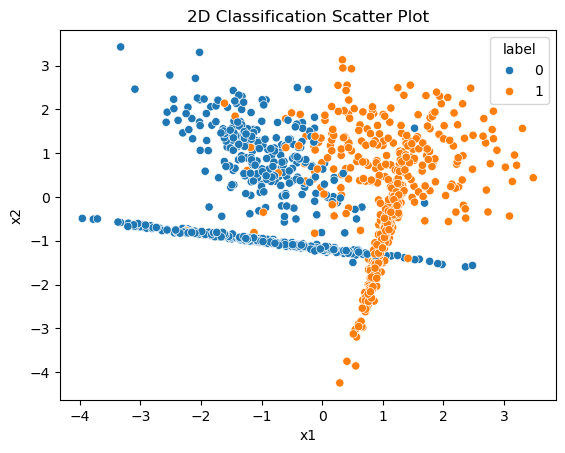

In [109]:
df = pd.DataFrame(X, columns=['x1', 'x2'])
df['label'] = y

# 3. Plot with seaborn
sns.scatterplot(data=df, x='x1', y='x2', hue='label')
plt.title("2D Classification Scatter Plot")
plt.show()

In [110]:
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=20)

In [111]:
from sklearn.svm import SVC

In [112]:
svc=SVC(kernel='linear')

In [113]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [114]:
##Prediction
y_pred=svc.predict(x_test)

In [115]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       115
           1       0.92      0.90      0.91       135

    accuracy                           0.90       250
   macro avg       0.90      0.90      0.90       250
weighted avg       0.90      0.90      0.90       250

[[104  14]
 [ 11 121]]


In [116]:
rbf=SVC(kernel='rbf')

In [117]:
rbf.fit(X_train,y_train)

SVC()

In [118]:
y_pred1= rbf.predict(x_test)

In [119]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_pred1,y_test))
print(confusion_matrix(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       118
           1       0.92      0.92      0.92       132

    accuracy                           0.91       250
   macro avg       0.91      0.91      0.91       250
weighted avg       0.91      0.91      0.91       250

[[107  11]
 [ 11 121]]


In [120]:
### Polynimoal
poly=SVC(kernel='poly')
poly.fit(X_train,y_train)
y_pred1= poly.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_pred1,y_test))
print(confusion_matrix(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.90      0.85      0.87       125
           1       0.86      0.90      0.88       125

    accuracy                           0.88       250
   macro avg       0.88      0.88      0.88       250
weighted avg       0.88      0.88      0.88       250

[[106  12]
 [ 19 113]]


In [121]:
##Sigmoid 
sig=SVC(kernel='sigmoid')
sig.fit(X_train,y_train)
y_pred1= sig.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_pred1,y_test))
print(confusion_matrix(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.75      0.72      0.74       123
           1       0.74      0.77      0.76       127

    accuracy                           0.75       250
   macro avg       0.75      0.75      0.75       250
weighted avg       0.75      0.75      0.75       250

[[89 29]
 [34 98]]


#### Hyper parameter tuning

In [125]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[.1,1,10,100,1000],
              'gamma':[1,.1,.01,.001,.0001],
              'kernel':['rbf']
             }

In [126]:
grid=GridSearchCV(SVC(),param_grid=param_grid,cv=5,verbose=3,refit=True)

In [127]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.933 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.920 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.913 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.967 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.927 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.927 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.907 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.887 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.953 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.920 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.887 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [128]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [129]:
y_pred = grid.predict(x_test)

In [130]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93       122
           1       0.92      0.95      0.93       128

    accuracy                           0.93       250
   macro avg       0.93      0.93      0.93       250
weighted avg       0.93      0.93      0.93       250

[[111   7]
 [ 11 121]]
